In [1]:
import os, sys
sys.path.append("./src")

In [2]:
from src.agents.DuelingDQN import DuelingDQN
import src.trainer as trainer
import src.logger as logger
import src.agents.utils as AgentUtils
import time

In [3]:
# Control random values
import random
import torch
import numpy as np

SEED = 0
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

In [4]:
params = {
    "n_plays": 200000,   
    "batch_size": 256,
    "buffer_capacity": 10000,
    "lr": 0.0001,
    "epsilon_start": 1.0,
    "epsilon_decay_prop": 0.7,
    "buffer_alpha": 0.7,
    "buffer_beta": 0.7,
    "update_target_every": 2000,
    "hidden_dim": 128,
    "save_agent": True,
    "debug": False,
}

start = time.time()

agent,  _, path, results = trainer.train_dqn_agent(DuelingDQN, **params)

logger.print_time(start)

100%|██████████| 200000/200000 [11:21:24<00:00,  4.89it/s]  


Checkpoint saved to D:\Albert DC\Documents\UOC\__TFG\TFG-Yahtzee\src\../models/DuelingDQN_2025-05-26_07-11-23.rl
Training time: 11:21:25.26


In [ ]:
# Load an existing checkpoint
# path = "./models"
# path = os.path.join(path, "DuelingDQN_2025-05-23_12-51-06")
agent = AgentUtils.load_agent(path, DuelingDQN)
results = AgentUtils.load_rewards(path + ".rwd")

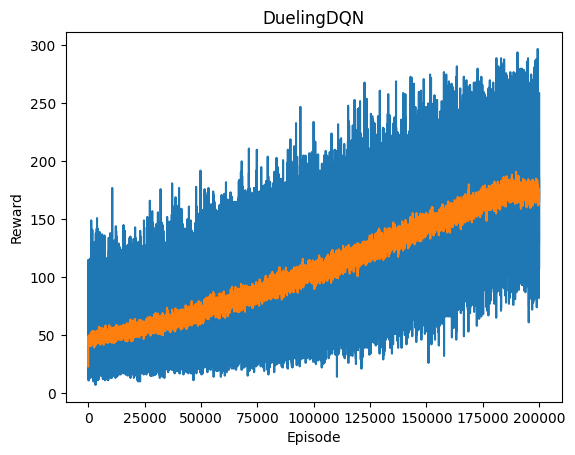

In [6]:
logger.print_train_results(results, agent.name)

In [8]:
# Evaluate agent
n_plays = 1000
avg_score, median_score, scores = trainer.evaluate_model(agent, n_plays)
    
logger.print_eval_results(n_plays, avg_score, median_score)

100%|██████████| 1000/1000 [00:22<00:00, 43.91it/s]

Evaluation results:
Score over 1000 games
Avg: 204.0, Median: 202.0
